# Isolation Forest

## Import Libraries

In [19]:

from sklearn.ensemble import IsolationForest
import sys
import warnings

warnings.filterwarnings('ignore')


## Import Functions

In [20]:
# path to functions
sys.path.insert(0, '../../src')

# import functions
import model_functions as mf

## Load Data

In [21]:
X, x_test = mf.load_data()
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22530 entries, 0 to 22529
Columns: 375 entries, TransactionID to D15_to_std_addr2
dtypes: float64(375)
memory usage: 64.5 MB


# Base Model - random

Run Time: 6s

## Hyperparameter Tunning

In [22]:
warnings.filterwarnings('ignore')


# parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_samples': ['auto', 128],
    'contamination': [0.01, 0.1, 0.2],
    'random_state': [42]
}

# grid search
best_params_bm = mf.hyper_tuning(IsolationForest, param_grid, X)

# best parameters
print(best_params_bm)

/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_s

{'contamination': 0.01, 'max_samples': 'auto', 'n_estimators': 100, 'random_state': 42}


## Train Model

In [23]:
# initialize the model with the best parameters
base_model = IsolationForest(**best_params_bm)

# train the model
base_model.fit(X)

IsolationForest(contamination=0.01, random_state=42)

## Evaluation

In [24]:
# evaluate the model
sil_score_bm, db_score_bm, ch_score_bm, anomaly_scores_bm, score_bm = mf.evaluate_model(base_model, X)

### Scores

In [25]:
# print metrics evaluation
mf.show_metrics(sil_score_bm, db_score_bm, ch_score_bm, score_bm, 'Base Model')

Silhouette Score of Base Model: 0.08882453003236043
Davies-Bouldin Score of Base Model: 2.7430101855248834
Calinski-Harabasz Score of Base Model: 17.602472523031942
Score of Base Model: 0.1435246037120711


### Anomaly Score Distribution

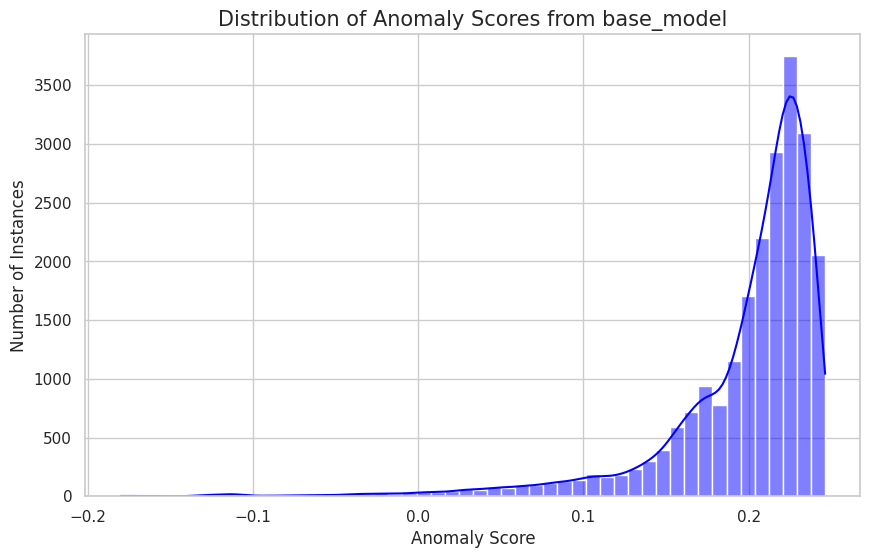

In [26]:
# plot the histogram of the anomaly scores
mf.plot_hist('if', anomaly_scores_bm, 'base_model')

# Model 1

Run Time: 35s

## Hyperparameter Tunning - add values the parameter grid

In [27]:
# parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_samples': ['auto', 128, 256, 512],
    'contamination': [0.01, 0.05, 0.1, 0.15, 0.2],
    'random_state': [42]
}

# grid search
best_params_m1 = mf.hyper_tuning(IsolationForest, param_grid, X)

# best parameters
print(best_params_m1)

/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_s

{'contamination': 0.01, 'max_samples': 'auto', 'n_estimators': 100, 'random_state': 42}


## Train Model

In [28]:
# initialize the model
model_1 = IsolationForest(**best_params_m1)

# train model
model_1.fit(X)

IsolationForest(contamination=0.01, random_state=42)

## Evaluation

In [29]:
# evaluate the model
sil_score_m1, db_score_m1, ch_score_m1, anomaly_scores_m1, score_m1 = mf.evaluate_model(model_1, X)

### Scores

In [30]:
# print metrics evaluation
mf.show_metrics(sil_score_m1, db_score_m1, ch_score_m1, score_m1, 'Model 1')

Silhouette Score of Model 1: 0.08882453003236043
Davies-Bouldin Score of Model 1: 2.7430101855248834
Calinski-Harabasz Score of Model 1: 17.602472523031942
Score of Model 1: 0.1435246037120711


### Anomaly Score Distribution

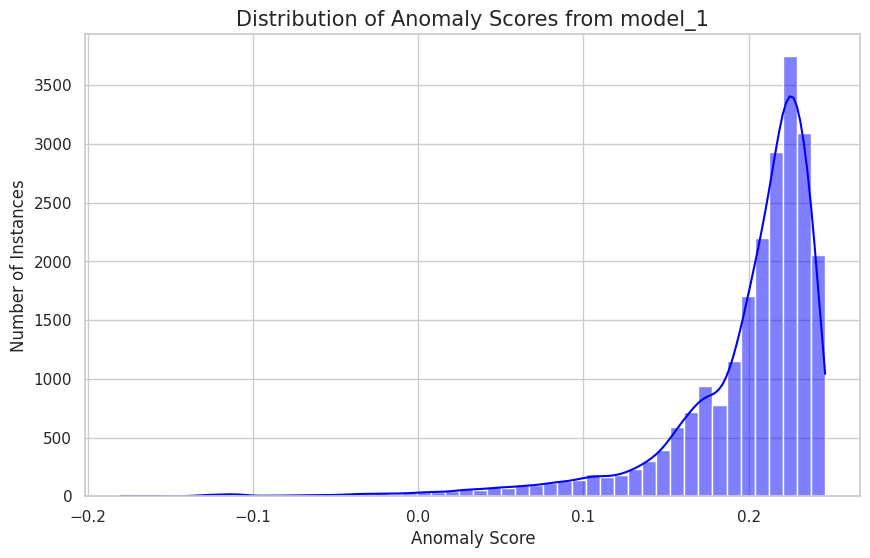

In [31]:
# plot the histogram of the anomaly scores
mf.plot_hist('if', anomaly_scores_m1, 'model_1')

# Model 2

Run Time: 9m34s

## Hyperparameter Tunning

In [32]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_samples': ['auto', 128, 256, 512],
    'contamination': [0.01, 0.05, 0.1, 0.2],
    'max_features': [0.5, 1.0],
    'bootstrap': [True, False],
    'random_state': [42]
}

# grid search
best_params_m2 = mf.hyper_tuning(IsolationForest, param_grid, X)

# best parameters
print(best_params_m2)

/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 980, in _score
    scores = scorer(estimator, X_test, **score_params)
TypeError: _BaseScorer.__call__() missing 1 required positional argument: 'y_true'

  warnings.warn(
/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:993: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/ndressler/.pyenv/versions/3.10.6/envs/financial_fraud/lib/python3.10/site-packages/sklearn/model_s

{'bootstrap': True, 'contamination': 0.01, 'max_features': 0.5, 'max_samples': 'auto', 'n_estimators': 100, 'random_state': 42}


## Train Model

In [33]:
# initialize the model
model_2 = IsolationForest(**best_params_m2)

# train model
model_2.fit(X)

IsolationForest(bootstrap=True, contamination=0.01, max_features=0.5,
                random_state=42)

## Evaluation

In [34]:
# evaluate the model
sil_score_m2, db_score_m2, ch_score_m2, anomaly_scores_m2, score_m2 = mf.evaluate_model(model_2, X)

### Scores

In [35]:
# get metrics evaluation
mf.show_metrics(sil_score_m2, db_score_m2, ch_score_m2, score_m2, 'Model 2')

Silhouette Score of Model 2: 0.0908943510362654
Davies-Bouldin Score of Model 2: 2.7278459400423287
Calinski-Harabasz Score of Model 2: 17.95181400973375
Score of Model 2: 0.15118751522227442


### Anomaly Score Distribution

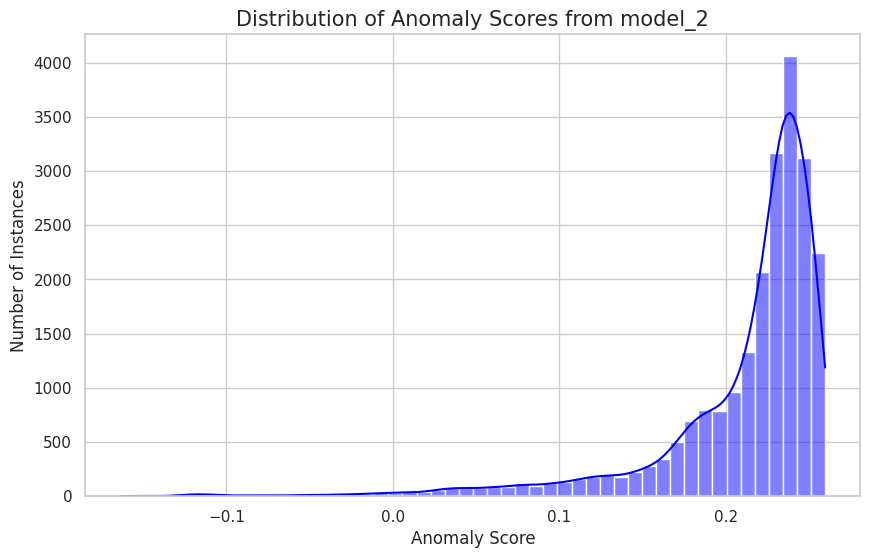

In [36]:
# plot the histogram of the anomaly scores
mf.plot_hist('if', anomaly_scores_m2, 'model_2')